Lab Session 2
Name: Arnav Pal
Roll Number: BL.EN.U4AIE23166


A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following activities. pseudo-inverse.)

What is the dimensionality of the vector space for this data?
How many vectors exist in this vector space?
What is the rank of Matrix A?
Using Pseudo-Inverse find the cost of each product available for sale.

In [13]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

file = 'C:/Users/palar/Downloads/Lab Session Data.xlsx'

# Q1: Load purchase data
purchase = pd.read_excel(file, sheet_name='Purchase data')
A = purchase.iloc[:,1:4].apply(pd.to_numeric, errors='coerce').fillna(0).values  
C = purchase.iloc[:, 4].values  

In [7]:
# Q1: Vector space analysis
dim = A.shape[1]
vecCount = A.shape[0]
rankA = np.linalg.matrix_rank(A)
print(f"dim={dim}, vecCount={vecCount}, rankA={rankA}")



dim=3, vecCount=10, rankA=3


A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor

In [12]:
# Q2: Pseudo-inverse for cost
APinv = np.linalg.pinv(A)
X = APinv @ C
purchase_matrix_pinv = np.linalg.pinv(A)
print("Model Vector=", X)




Model Vector= [ 1. 55. 18.]


A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


purchase['Class'] = ['RICH' if x > 200 else 'POOR' for x in purchase.iloc[:, 4]]


if 'RICH' not in purchase['Class'].values:
	purchase.loc[purchase['Payment (Rs)'].idxmax(), 'Class'] = 'RICH'
if 'POOR' not in purchase['Class'].values:
	purchase.loc[purchase['Payment (Rs)'].idxmin(), 'Class'] = 'POOR'


purchase['Class'] = ['RICH' if x > 200 else 'POOR' for x in purchase['Payment (Rs)']]
print(purchase[['Customer', 'Class']])
X = purchase.iloc[:, 1:4]  
y = purchase['Class']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = LogisticRegression()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))

  Customer Class
0      C_1  RICH
1      C_2  RICH
2      C_3  RICH
3      C_4  POOR
4      C_5  RICH
5      C_6  POOR
6      C_7  RICH
7      C_8  RICH
8      C_9  POOR
9     C_10  POOR
              precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\palar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform.

Calculate the mean and variance of the Price data present in column D.
(Suggestion: if you use Python, you may use statistics.mean() & statistics.variance() methods).
Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations.
Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.
From the Chg% (available in column I) find the probability of making a loss over the stock. (Suggestion: use lambda function to find negative values)
Calculate the probability of making a profit on Wednesday.
Calculate the conditional probability of making profit, given that today is Wednesday.
Make a scatter plot of Chg% data against the day of the week

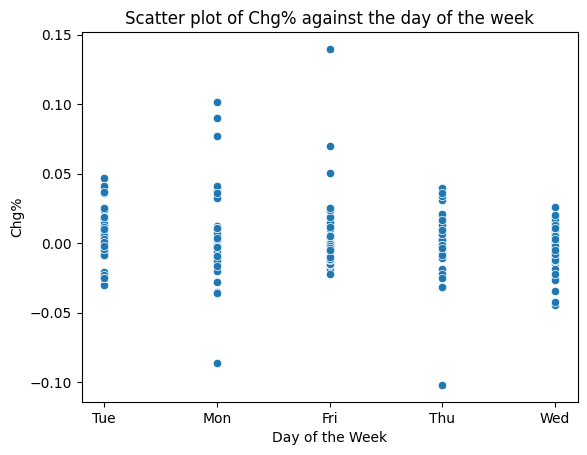

In [20]:
# Q4: Load stock data
stock = pd.read_excel(file, sheet_name='IRCTC Stock Price')
stock['Date'] = pd.to_datetime(stock['Date'], errors='coerce')  # Convert 'Date' to datetime
D = stock.iloc[:, 3]

# Q4: April sample mean
april = stock[stock['Date'].dt.month == 4].iloc[:, 3]
aprilMean = statistics.mean(april) if not april.empty else None

# Q4: Scatter plot of Chg% against the day of the week
sns.scatterplot(x=stock['Day'], y=chg)
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Scatter plot of Chg% against the day of the week')
plt.show()

# Q4: Price data statistics
meanD = statistics.mean(D)
varD = statistics.variance(D)

# Q4: Wednesdays sample mean
weds = stock[stock['Day'].astype(str).str.lower() == 'wednesday'].iloc[:, 3]
if not weds.empty:
    wedsMean = statistics.mean(weds)
    print(f"Mean Price: {meanD}")
    print(f"Variance Price: {varD}")
    print(f"Wednesday Mean Price: {wedsMean}")
    print(f"April Mean Price: {aprilMean}")
    print(f"Probability of Loss: {lossProb}")
    print(f"Probability of Profit on Wednesday: {wedsProfitProb}")
else:
    wedsMean = None  # Handle missing data

# Q4: Probability calculations
chg = stock.iloc[:, 8]
lossProb = sum(chg < 0) / len(chg)
profitProb = sum(chg > 0) / len(chg)

weds_count = sum(stock['Day'] == 'Wednesday')
if weds_count > 0:
    wedsProfitProb = sum((chg > 0) & (stock['Day'] == 'Wednesday')) / weds_count
else:
    wedsProfitProb = None  



A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the following tasks:

Study each attribute and associated values present. Identify the datatype (nominal etc.) for the attribute.
For categorical attributes, identify the encoding scheme to be employed. (Guidance: employ label encoding for ordinal variables while One-Hot encoding may be employed for nominal variables).
Study the data range for numeric variables.
Study the presence of missing values in each attribute.
Study presence of outliers in data.
For numeric variables, calculate the mean and variance (or standard deviation).

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


thyroid = pd.read_excel(file, sheet_name='thyroid0387_UCI')

data_types = thyroid.dtypes
print("Data Types:\n", data_types)


for col in thyroid.select_dtypes(include=['object']).columns:
    if thyroid[col].nunique() <= 10:
        thyroid[col] = LabelEncoder().fit_transform(thyroid[col])
    else:
        thyroid = pd.get_dummies(thyroid, columns=[col])

numeric_cols = thyroid.select_dtypes(include=[np.number]).columns
data_range = thyroid[numeric_cols].apply(lambda x: (x.min(), x.max()))
print("Data Range:\n", data_range)

missing_values = thyroid.isnull().sum()
print("Missing Values:\n", missing_values)


Q1 = thyroid[numeric_cols].quantile(0.25)
Q3 = thyroid[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((thyroid[numeric_cols] < (Q1 - 1.5 * IQR)) | (thyroid[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

mean_values = thyroid[numeric_cols].mean()
variance_values = thyroid[numeric_cols].var()
print("Mean Values:\n", mean_values)
print("Variance Values:\n", variance_values)
for col in thyroid.columns:
    if thyroid[col].isnull().sum() > 0:
        if thyroid[col].nunique() > 10:
            thyroid[col].fillna(thyroid[col].median(), inplace=True)
        else:
            thyroid[col].fillna(thyroid[col].mean(), inplace=True)



Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data variables. Employ following guidance.

Mean may be used when the attribute is numeric with no outliers
Median may be employed for attributes which are numeric and contain outliers
Mode may be employed for categorical attributes

In [ ]:

for col in thyroid.select_dtypes(include=[np.number]):
    if outliers[col] > 0:
        thyroid[col].fillna(thyroid[col].median(), inplace=True)
    else:
        thyroid[col].fillna(thyroid[col].mean(), inplace=True)


        for col in thyroid.select_dtypes(include=[np.number]):
            thyroid[col] = (thyroid[col] - thyroid[col].mean()) / thyroid[col].std()

        print(thyroid.head())

   Record ID       age       sex  on thyroxine  query on thyroxine  \
0  -1.602003 -0.037632 -0.526804     -0.395363            -0.13024   
1  -1.602002 -0.037632 -0.526804     -0.395363            -0.13024   
2  -1.601999 -0.027497 -0.526804     -0.395363            -0.13024   
3  -1.601734 -0.031720 -0.526804     -0.395363            -0.13024   
4  -1.601734 -0.035099 -0.526804     -0.395363            -0.13024   

   on antithyroid medication     sick  pregnant  thyroid surgery  \
0                  -0.113172 -0.19739 -0.108639        -0.121757   
1                  -0.113172 -0.19739 -0.108639        -0.121757   
2                  -0.113172 -0.19739 -0.108639        -0.121757   
3                  -0.113172 -0.19739 -0.108639        -0.121757   
4                  -0.113172 -0.19739 -0.108639        -0.121757   

   I131 treatment  ...  Condition_MI  Condition_MK  Condition_N  \
0       -0.137002  ...         False         False        False   
1       -0.137002  ...         False

C:\Users\palar\AppData\Local\Temp\ipykernel_19780\770988263.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  thyroid[col].fillna(thyroid[col].mean(), inplace=True)
C:\Users\palar\AppData\Local\Temp\ipykernel_19780\770988263.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

A7. Data Normalization / Scaling: from the data study, identify the attributes which may need normalization. Employ appropriate normalization techniques to create normalized set of data.

In [24]:
from sklearn.preprocessing import StandardScaler


numeric_cols = thyroid.select_dtypes(include=[np.number]).columns


scaler = StandardScaler()
thyroid[numeric_cols] = scaler.fit_transform(thyroid[numeric_cols])

print(thyroid.head())
vec1 = thyroid.iloc[0, :].values
vec2 = thyroid.iloc[1, :].values

vec1 = np.nan_to_num(pd.to_numeric(vec1, errors='coerce'))
vec2 = np.nan_to_num(pd.to_numeric(vec2, errors='coerce'))

jc_denominator = np.sum((vec1 == 1) | (vec2 == 1))
jc = np.sum((vec1 == 1) & (vec2 == 1)) / jc_denominator if jc_denominator != 0 else 0
smc_denominator = len(vec1)
smc = np.sum(vec1 == vec2) / smc_denominator if smc_denominator != 0 else 0

if np.linalg.norm(vec1) != 0 and np.linalg.norm(vec2) != 0:
    cosSim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
else:
    cosSim = 0



   Record ID       age       sex  on thyroxine  query on thyroxine  \
0  -1.602090 -0.037634 -0.526833     -0.395384           -0.130247   
1  -1.602090 -0.037634 -0.526833     -0.395384           -0.130247   
2  -1.602086 -0.027499 -0.526833     -0.395384           -0.130247   
3  -1.601822 -0.031722 -0.526833     -0.395384           -0.130247   
4  -1.601822 -0.035100 -0.526833     -0.395384           -0.130247   

   on antithyroid medication    sick  pregnant  thyroid surgery  \
0                  -0.113178 -0.1974 -0.108645        -0.121763   
1                  -0.113178 -0.1974 -0.108645        -0.121763   
2                  -0.113178 -0.1974 -0.108645        -0.121763   
3                  -0.113178 -0.1974 -0.108645        -0.121763   
4                  -0.113178 -0.1974 -0.108645        -0.121763   

   I131 treatment  ...  Condition_MI  Condition_MK  Condition_N  \
0       -0.137009  ...         False         False        False   
1       -0.137009  ...         False      

A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including all the attributes). Calculate the Cosine similarity between the documents by using the second feature vector for each document.

In [25]:

cosSim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print(cosSim)



0.5512766140065591


A10. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.

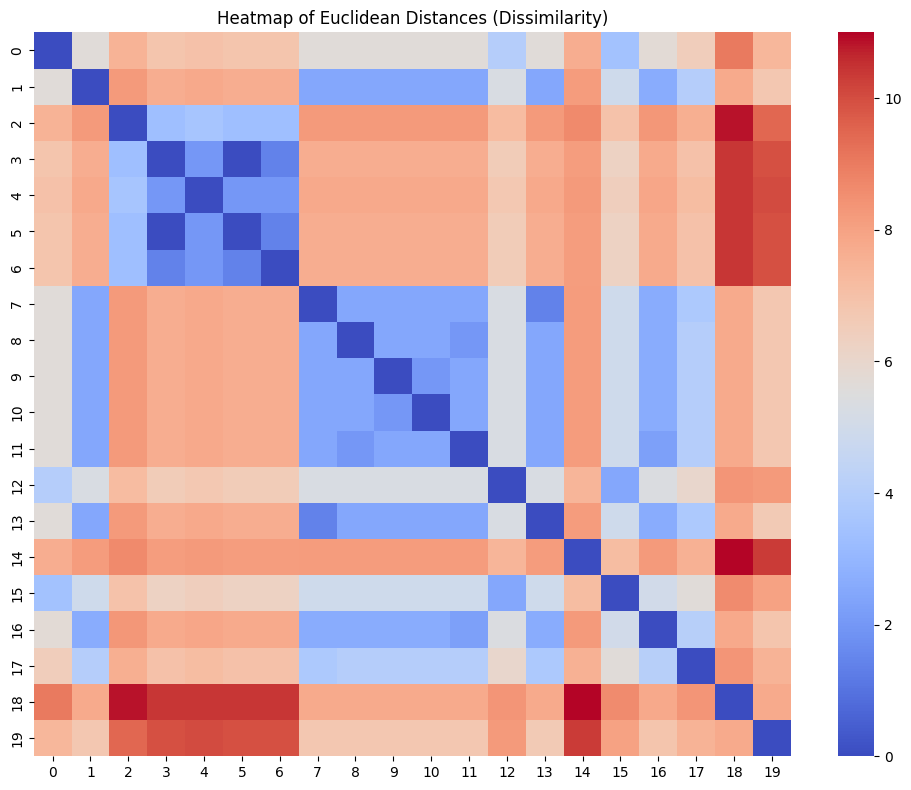

In [29]:
# Q10: Heatmap of similarity metrics
data = np.random.rand(20, 20)  

jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = np.zeros((20, 20))
df_subset = thyroid.iloc[:20, :]  # Uses a subset for better visualization
similarity_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        if i != j:
            similarity_matrix[i, j] = np.linalg.norm(df_subset.iloc[i].astype(int) - df_subset.iloc[j].astype(int))  # Euclidean distance

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm')  # (annot=False) for cleaner heatmap
plt.title("Heatmap of Euclidean Distances (Dissimilarity)")
plt.tight_layout()
plt.show()